**KNN**

<ipython-input-36-5faa4c103544>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


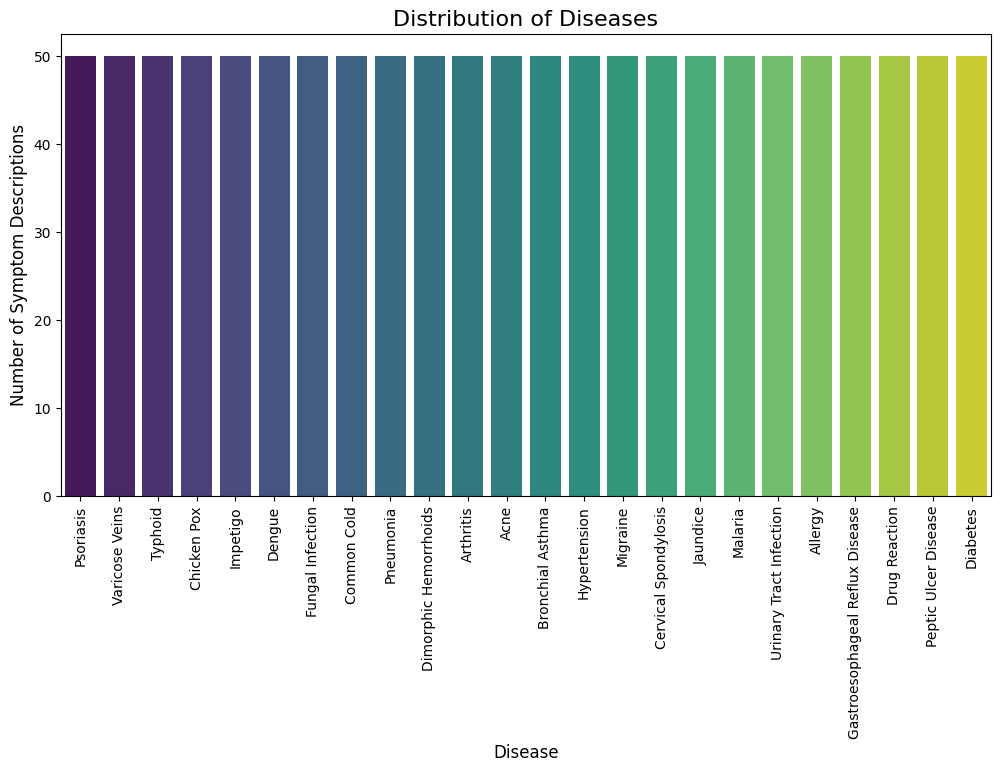

Text for Psoriasis: I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches. My skin has been peeling, especially on my knees, elbows, ...


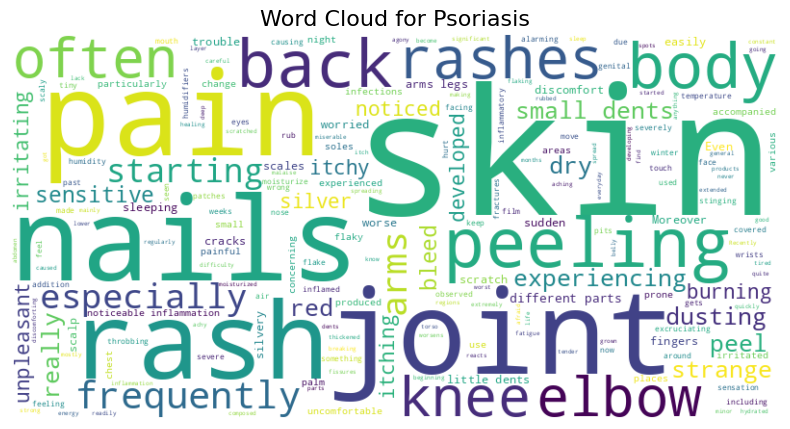

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.9369047619047619


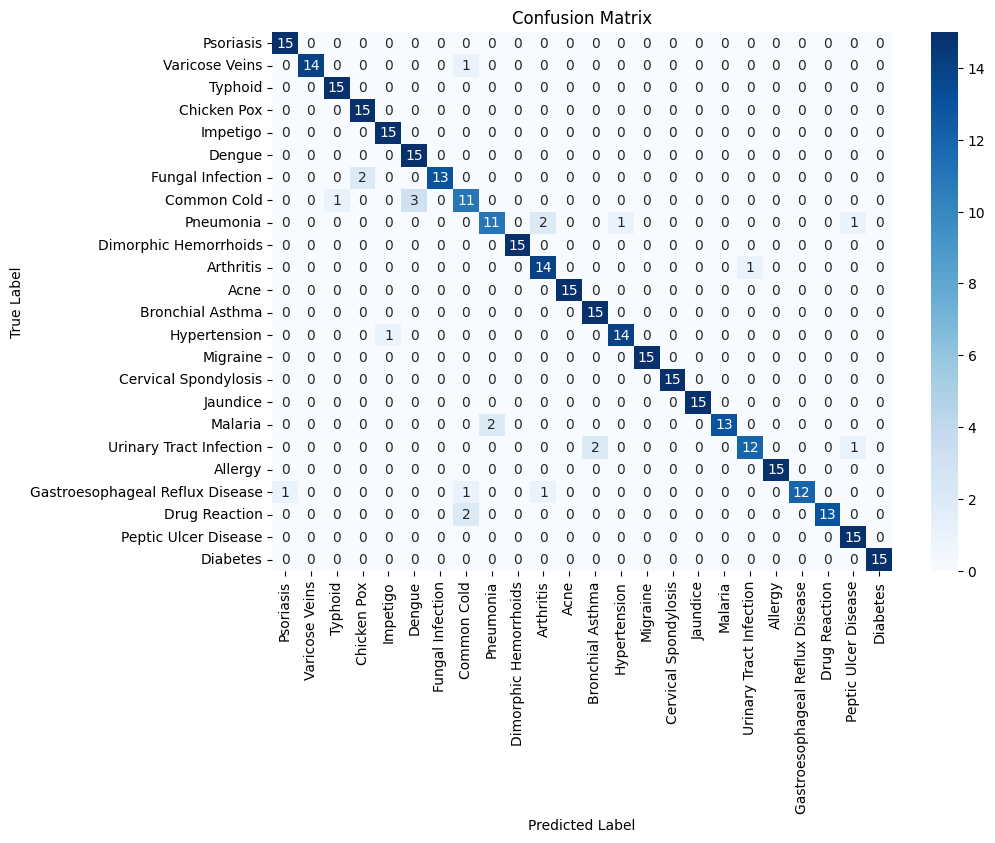

Classification Report:
                                 precision    recall  f1-score   support

                      Psoriasis       0.94      1.00      0.97        15
                 Varicose Veins       1.00      0.93      0.97        15
                        Typhoid       0.94      1.00      0.97        15
                    Chicken Pox       0.88      1.00      0.94        15
                       Impetigo       0.94      1.00      0.97        15
                         Dengue       0.83      1.00      0.91        15
               Fungal Infection       1.00      0.87      0.93        15
                    Common Cold       0.73      0.73      0.73        15
                      Pneumonia       0.85      0.73      0.79        15
          Dimorphic Hemorrhoids       1.00      1.00      1.00        15
                      Arthritis       0.82      0.93      0.88        15
                           Acne       1.00      1.00      1.00        15
               Bronchial As

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
symptom_df = pd.read_csv('/content/Symptom2Disease.csv')
symptom_df['label'] = symptom_df['label'].apply(str.title)
symptom_df.head(10)
symptom_df = symptom_df.drop('Unnamed: 0', axis=1)
symptom_df
# Exploratory Data Analysis
# Distribution Frequency of Diseases

disease_counts = symptom_df['label'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')

plt.title('Distribution of Diseases', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Symptom Descriptions', fontsize=12)

plt.xticks(rotation=90)

plt.show()
# Word Cloud of Different Diseases

disease = 'Psoriasis'
disease_text = " ".join(symptom_df[symptom_df['label'] == disease]['text'])

print(f"Text for {disease}: {disease_text[:200]}...")  # Print first 200 characters

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disease_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for word cloud
plt.title(f'Word Cloud for {disease}', fontsize=16)
plt.show()
# Preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

from textblob import TextBlob
import nltk

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
import string
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to get the WordNet POS tag from NLTK POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Function to lemmatize a single text
def lemmatize_text(text):

    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_tokens]

    return " ".join(lemmatized_tokens)

# Function to remove common stopwords
def remove_stopwords(text):

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return " ".join(filtered_words)

# Function to remove punctuations and make texts lowercase
def remove_punctuations_and_lowercase(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function that encapsulates the other preprocessing techniques
def preprocessing(text):
    removed_stopwords = remove_stopwords(text)
    lemmatized = lemmatize_text(removed_stopwords)
    finalised_text = remove_punctuations_and_lowercase(lemmatized)

    return finalised_text
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

symptom_df_w2v = symptom_df.copy()
symptom_df_w2v['text'] = symptom_df['text'].apply(preprocessing)
symptom_df_w2v
# NLP Models Creation
#TF-IDF Vectorization with KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


tfidf_vectorizer = TfidfVectorizer(max_features=1500)

X_train_text, X_test_text, y_train, y_test = train_test_split(symptom_df_w2v['text'],
                                                              symptom_df['label'],
                                                              stratify=symptom_df['label'],
                                                              test_size=0.3,
                                                              random_state=42)

X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)
# Cross Validation with Grid Search to Determine the Best Model Parameters

param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute the nearest neighbors
}

knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=4,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_knn_classifier = grid_search.best_estimator_
# Predict on test set
y_pred = best_knn_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=symptom_df['label'].unique(),
            yticklabels=symptom_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
report = classification_report(y_test, y_pred, target_names=symptom_df['label'].unique())

# Print classification report
print("Classification Report:")
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")
symptom = "I have a lot of trouble breathing, my chest feels heavy and i cough mucus"
preprocessed_symptom = preprocessing(symptom)
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])
predicted_disease = best_knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')

In [ ]:
!pip uninstall -y numpy gensim
!pip install numpy==1.26.4
!pip install gensim --no-cache-dir

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 322.1 MB/s eta 0:00:00


**XGBoost**

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


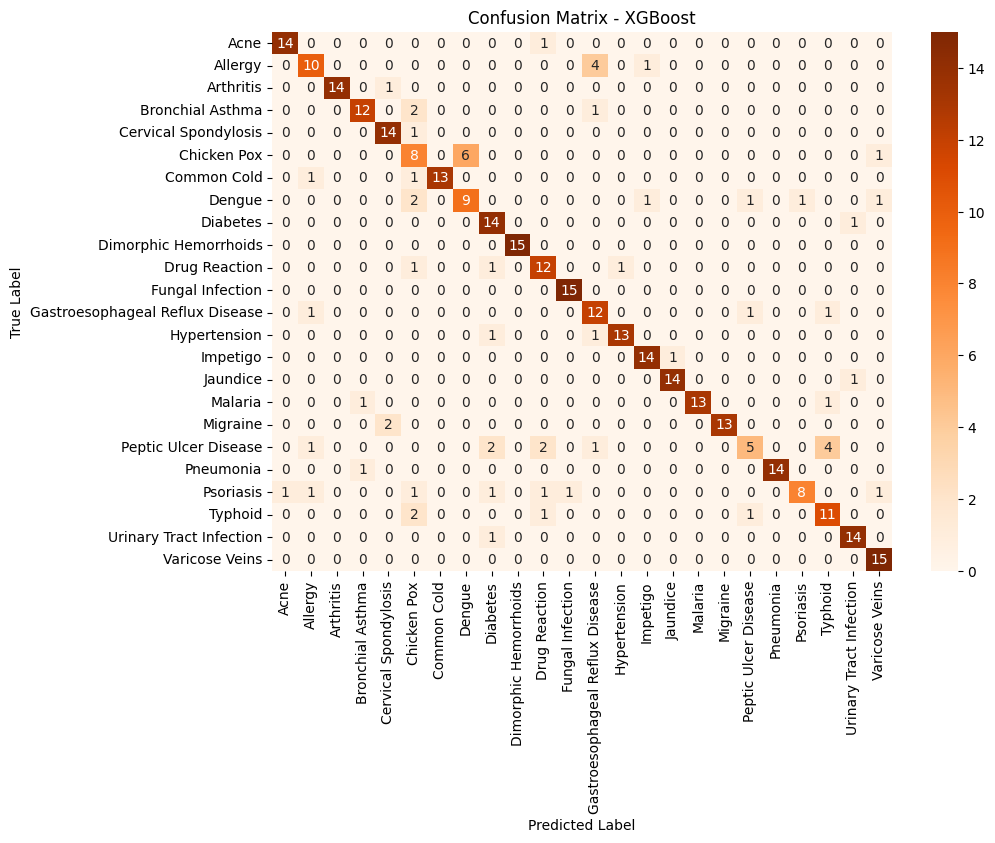

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       0.93      0.93      0.93        15
                        Allergy       0.71      0.67      0.69        15
                      Arthritis       1.00      0.93      0.97        15
               Bronchial Asthma       0.86      0.80      0.83        15
           Cervical Spondylosis       0.82      0.93      0.88        15
                    Chicken Pox       0.44      0.53      0.48        15
                    Common Cold       1.00      0.87      0.93        15
                         Dengue       0.60      0.60      0.60        15
                       Diabetes       0.70      0.93      0.80        15
          Dimorphic Hemorrhoids       1.00      1.00      1.00        15
                  Drug Reaction       0.71      0.80      0.75        15
               Fungal Infection       0.94      1.00      0.97        15
Gastroesophageal Reflux Dis

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
symptom_df = pd.read_csv('/content/Symptom2Disease.csv')
symptom_df['label'] = symptom_df['label'].apply(str.title)
symptom_df.head(10)
symptom_df = symptom_df.drop('Unnamed: 0', axis=1)
symptom_df

# Preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

from textblob import TextBlob
import nltk

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
import string
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to get the WordNet POS tag from NLTK POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Function to lemmatize a single text
def lemmatize_text(text):

    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_tokens]

    return " ".join(lemmatized_tokens)

# Function to remove common stopwords
def remove_stopwords(text):

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return " ".join(filtered_words)

# Function to remove punctuations and make texts lowercase
def remove_punctuations_and_lowercase(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function that encapsulates the other preprocessing techniques
def preprocessing(text):
    removed_stopwords = remove_stopwords(text)
    lemmatized = lemmatize_text(removed_stopwords)
    finalised_text = remove_punctuations_and_lowercase(lemmatized)

    return finalised_text
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

symptom_df_w2v = symptom_df.copy()
symptom_df_w2v['text'] = symptom_df['text'].apply(preprocessing)
symptom_df_w2v
# NLP Models Creation
#TF-IDF Vectorization with KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


tfidf_vectorizer = TfidfVectorizer(max_features=1500)

X_train_text, X_test_text, y_train, y_test = train_test_split(symptom_df_w2v['text'],
                                                              symptom_df['label'],
                                                              stratify=symptom_df['label'],
                                                              test_size=0.3,
                                                              random_state=42)

X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

# Create the XGBoost model
xgb_classifier = XGBClassifier(eval_metric='mlogloss')

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels
label_encoder.fit(y_train)

# Transform both training and testing labels to numerical values
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, use the encoded labels for training and prediction
xgb_classifier.fit(X_train, y_train_encoded)  # Use encoded training labels
y_pred = xgb_classifier.predict(X_test)  # Predict on test data

# If you want to get the original disease names back from the predictions, use inverse_transform:
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Predict on test set
y_pred = xgb_classifier.predict(X_test)

# Confusion Matrix - use encoded labels for both y_test and y_pred
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_encoder.classes_,  # Use encoder classes for labels
            yticklabels=label_encoder.classes_)  # Use encoder classes for labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Classification Report - use encoded labels and decode for report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Accuracy - use encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.5f}")


**Logistic Regression**

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


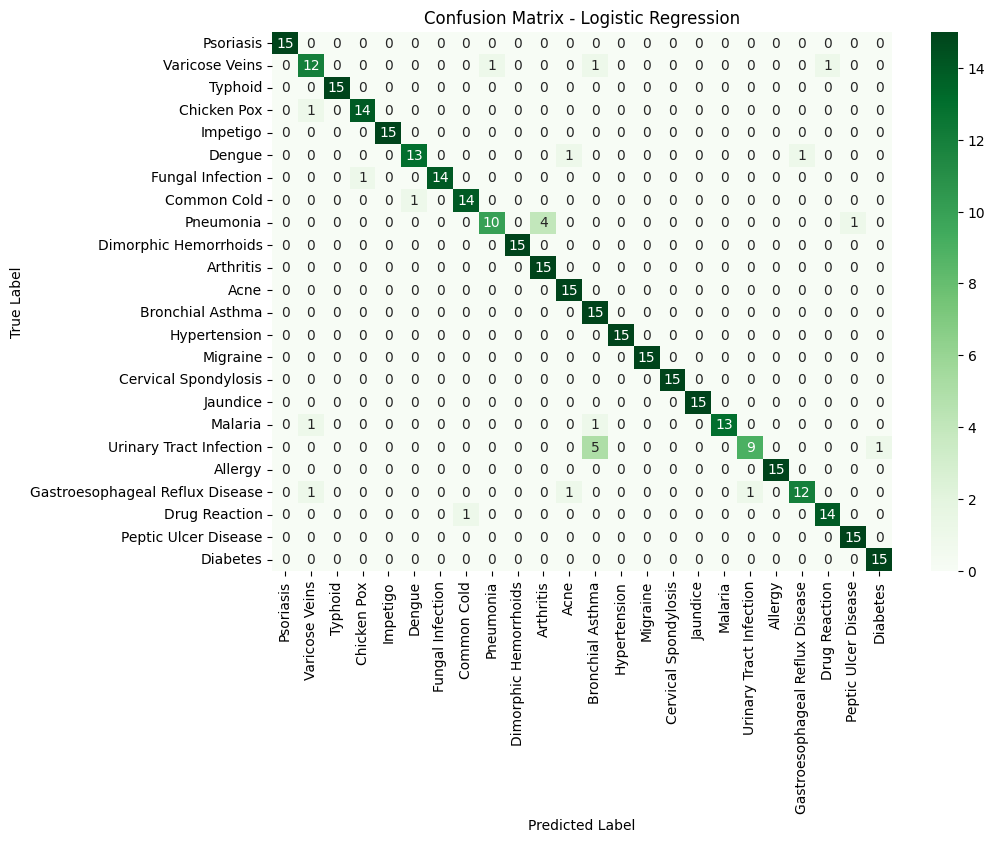

Classification Report:
                                 precision    recall  f1-score   support

                      Psoriasis       1.00      1.00      1.00        15
                 Varicose Veins       0.80      0.80      0.80        15
                        Typhoid       1.00      1.00      1.00        15
                    Chicken Pox       0.93      0.93      0.93        15
                       Impetigo       1.00      1.00      1.00        15
                         Dengue       0.93      0.87      0.90        15
               Fungal Infection       1.00      0.93      0.97        15
                    Common Cold       0.93      0.93      0.93        15
                      Pneumonia       0.91      0.67      0.77        15
          Dimorphic Hemorrhoids       1.00      1.00      1.00        15
                      Arthritis       0.79      1.00      0.88        15
                           Acne       0.88      1.00      0.94        15
               Bronchial As

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
symptom_df = pd.read_csv('/content/Symptom2Disease.csv')
symptom_df['label'] = symptom_df['label'].apply(str.title)
symptom_df.head(10)
symptom_df = symptom_df.drop('Unnamed: 0', axis=1)
symptom_df

# Preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

from textblob import TextBlob
import nltk

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
import string
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to get the WordNet POS tag from NLTK POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Function to lemmatize a single text
def lemmatize_text(text):

    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_tokens]

    return " ".join(lemmatized_tokens)

# Function to remove common stopwords
def remove_stopwords(text):

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return " ".join(filtered_words)

# Function to remove punctuations and make texts lowercase
def remove_punctuations_and_lowercase(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function that encapsulates the other preprocessing techniques
def preprocessing(text):
    removed_stopwords = remove_stopwords(text)
    lemmatized = lemmatize_text(removed_stopwords)
    finalised_text = remove_punctuations_and_lowercase(lemmatized)

    return finalised_text
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

symptom_df_w2v = symptom_df.copy()
symptom_df_w2v['text'] = symptom_df['text'].apply(preprocessing)
symptom_df_w2v
# NLP Models Creation
#TF-IDF Vectorization with KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


tfidf_vectorizer = TfidfVectorizer(max_features=1500)

X_train_text, X_test_text, y_train, y_test = train_test_split(symptom_df_w2v['text'],
                                                              symptom_df['label'],
                                                              stratify=symptom_df['label'],
                                                              test_size=0.3,
                                                              random_state=42)

X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

# Train Logistic Regression on TF-IDF features
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=symptom_df['label'].unique(),
            yticklabels=symptom_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=symptom_df['label'].unique()))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")